In [1]:
import pickle
import shap
import pandas as pd
import numpy as np

#getting the model 
pickled_model = pickle.load(open('parscat_4.pkl', 'rb'))

def make_prediction(classifier, input_data):
    prediction = round(classifier.predict_proba(input_data)[0][0],4)
    response = f"This model predicts you have a {np.round(prediction, 4) * 100}% chance of graduating university"
    return response 

In [2]:
#variables to be chosen by the user and then run,
Tuition = 1
Scholarship = 1
International = 1
Debtor = 1
Displaced = 1
Attendance = 1
Degree = "Business/Economics"



In [3]:
user_dict = {'Tuition fees up to date': Tuition, 
            'Scholarship holder': Scholarship,
            'International': International,
            'Debtor': Debtor,
            'Displaced': Displaced,
            'Daytime/evening attendance': Attendance, 
            'Degree': Degree}

In [4]:
X = pd.DataFrame.from_dict(user_dict, orient = 'index').T

In [5]:
prediction = make_prediction(pickled_model, X)

In [6]:
print(prediction)

This model predicts you have a 43.97% chance of graduating university


In [7]:
explainer = shap.TreeExplainer(pickled_model)
shap_values = explainer.shap_values(X)



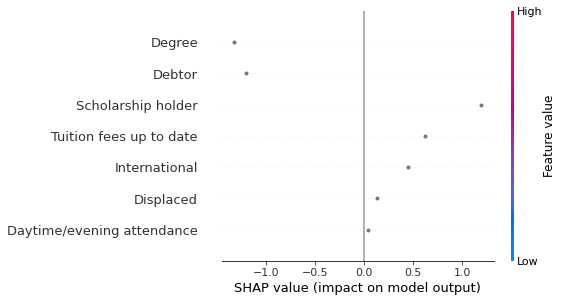

In [8]:
shap.summary_plot(shap_values, X)